# **1. Perkenalan Dataset**

Eksperimen ini menggunakan dataset Iris dari Scikit-Learn yang berisi 150 sampel bunga iris dengan empat fitur (sepal length, sepal width, petal length, petal width) dan tiga label spesies. Tujuan utamanya adalah menyiapkan data yang bersih dan terstandarisasi untuk pelatihan model klasifikasi.

Dataset dipilih karena: 
- Struktur sederhana namun cukup menantang (tiga kelas seimbang).
- Semua fitur numerik sehingga cocok untuk pipeline preprocessing umum.
- Mudah direproduksi tanpa akses internet tambahan.

# **2. Import Library**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Lokasi file relatif terhadap notebook
BASE_DIR = Path.cwd()
RAW_PATH = (BASE_DIR / '../namadataset_raw/iris_raw.csv').resolve()
PREP_DIR = BASE_DIR / 'namadataset_preprocessing'
PREP_DIR.mkdir(exist_ok=True)
RAW_PATH

WindowsPath('C:/Project/Submission_MSML/SMSML_MuhammadAlwanFarras/Eksperimen_SML_MuhammadAlwanFarras/namadataset_raw/iris_raw.csv')

# **3. Memuat Dataset**

Membaca dataset mentah dari folder 
amadataset_raw lalu menampilkan beberapa baris awal untuk verifikasi.

In [6]:
df = pd.read_csv(RAW_PATH)
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **4. Exploratory Data Analysis (EDA)**

Pemeriksaan struktur data, nilai kosong, dan duplikasi untuk memahami kualitas data sebelum modeling.

In [7]:
print('Struktur kolom:')
_ = df.info()

print('\nRingkasan statistik:')
display(df.describe())

missing = df.isna().sum()
print('\nJumlah nilai kosong per kolom:\n', missing)

duplicates = df.duplicated().sum()
print('\nJumlah baris duplikat:', duplicates)


Struktur kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

Ringkasan statistik:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Jumlah nilai kosong per kolom:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Jumlah baris duplikat: 1


Distribusi label untuk memastikan dataset seimbang dan tidak bias.

   count  count
0      0     50
1      1     50
2      2     50


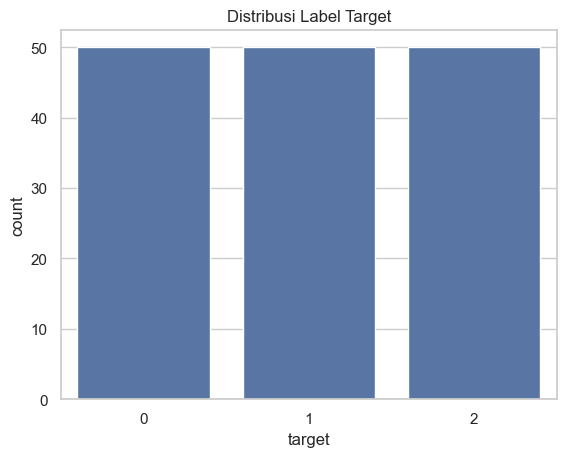

In [8]:
target_counts = df['target'].value_counts().reset_index().rename(columns={'index': 'class', 'target': 'count'})
print(target_counts)

sns.countplot(data=df, x='target', order=df['target'].value_counts().index)
plt.title('Distribusi Label Target')
plt.show()

Hubungan antar fitur untuk melihat separasi kelas secara visual.

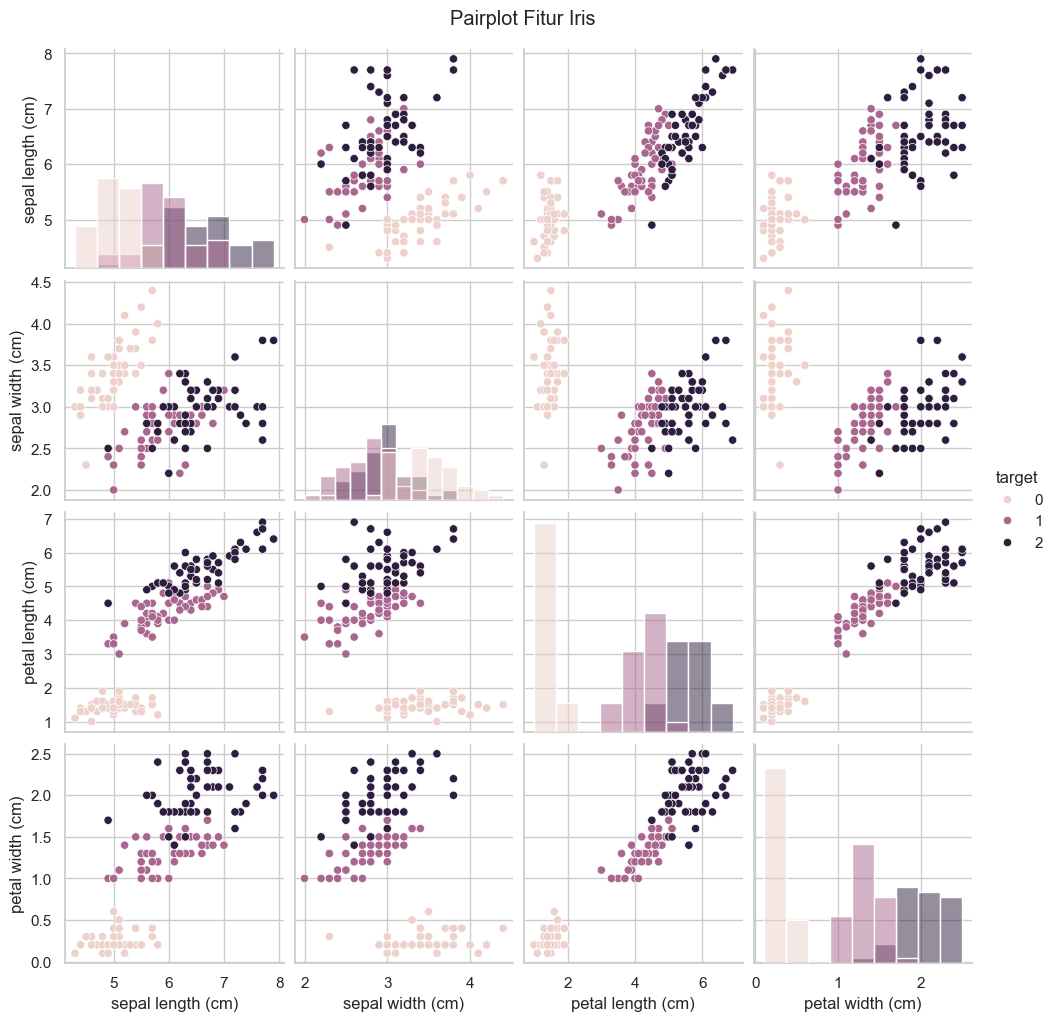

In [9]:
sns.pairplot(df, hue='target', diag_kind='hist')
plt.suptitle('Pairplot Fitur Iris', y=1.02)
plt.show()

Korelasi antar fitur numerik untuk menilai multikolinieritas.

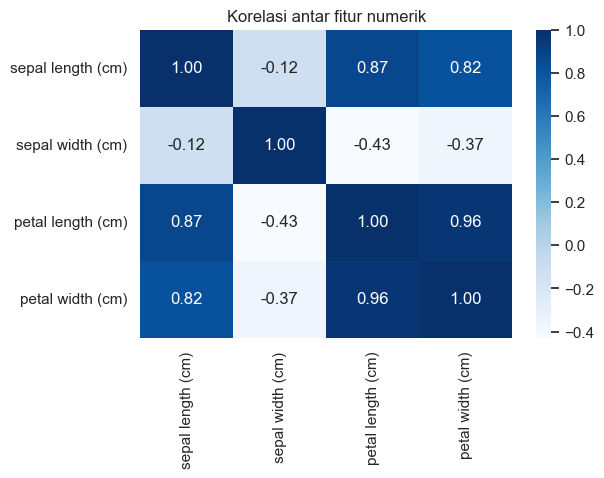

In [10]:
corr = df.drop(columns=['target']).corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Korelasi antar fitur numerik')
plt.show()

# **5. Data Preprocessing**

Langkah yang dilakukan:
- Menghapus duplikasi jika ada.
- Memisahkan fitur dan target.
- Imputasi median untuk jaga-jaga jika ada nilai kosong.
- Standardisasi fitur numerik.
- Encoding label menjadi angka.
- Menyimpan dataset siap latih ke 
amadataset_preprocessing/iris_preprocessed.csv.

In [11]:
df_clean = df.drop_duplicates().copy()
feature_cols = [col for col in df_clean.columns if col != 'target']
target = df_clean['target']

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
    ]
)

preprocess = ColumnTransformer(
    transformers=[('num', numeric_transformer, feature_cols)],
    remainder='drop'
)

X_processed = preprocess.fit_transform(df_clean[feature_cols])
processed_df = pd.DataFrame(
    X_processed, columns=[f'feature_{i+1}' for i in range(X_processed.shape[1])]
)

encoder = LabelEncoder()
processed_df['target'] = encoder.fit_transform(target)

print('Processed shape:', processed_df.shape)
processed_df.head()

Processed shape: (149, 5)


,feature_1,feature_2,feature_3,feature_4,target
0,-0.898033,1.012401,-1.333255,-1.308624,0
1,-1.139562,-0.137353,-1.333255,-1.308624,0
2,-1.381091,0.322549,-1.390014,-1.308624,0
3,-1.501855,0.092598,-1.276496,-1.308624,0
4,-1.018798,1.242352,-1.333255,-1.308624,0


In [12]:
output_path = PREP_DIR / 'iris_preprocessed.csv'
processed_df.to_csv(output_path, index=False)
print('Dataset siap latih disimpan di:', output_path)
processed_df.describe().T

Dataset siap latih disimpan di: c:\Project\Submission_MSML\SMSML_MuhammadAlwanFarras\Eksperimen_SML_MuhammadAlwanFarras\preprocessing\namadataset_preprocessing\iris_preprocessed.csv


,count,mean,std,min,25%,50%,75%,max
feature_1,149.0,1.049124e-15,1.003373,-1.864149,-0.898033,-0.052682,0.671904,2.483370
feature_2,149.0,1.669060e-16,1.003373,-2.436862,-0.597255,-0.137353,0.552499,3.081959
feature_3,149.0,-1.430623e-16,1.003373,-1.560289,-1.219738,0.312744,0.766812,1.788466
feature_4,149.0,-4.768743e-16,1.003373,-1.440192,-1.177055,0.138633,0.796477,1.717458
target,149.0,9.932886e-01,0.817847,0.000000,0.000000,1.000000,2.000000,2.000000


Dataset siap digunakan untuk tahap modelling selanjutnya. Gunakan file iris_preprocessed.csv agar pipeline di modul modelling/CI konsisten dengan eksperimen manual.